In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [8]:
conn = sqlite3.connect('ativos.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
query =" SELECT sigla, qtd FROM ativos WHERE moeda = 'REIT';"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [9]:
start = datetime(2018,1,1)
ativos

['O', 'NNN']

In [10]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [11]:
acoes.tail(12)

,O,NNN
Date,,
2021-02-19,60.856911,42.250000
2021-02-22,61.863052,43.810001
2021-02-23,62.141987,45.110001
2021-02-24,62.132023,45.590000
2021-02-25,61.355003,44.299999
2021-02-26,60.259998,43.840000
2021-03-01,60.509998,43.549999
2021-03-02,60.369999,42.709999
2021-03-03,60.779999,42.720001


# Retorno Simples = PF - PI / PI
### Se tiver dividendo/rendimentos podemos adcioná-lo ao PF

In [12]:
#retorno diario dos aivos ( ideal para calculo de váriaos ativos)
#pf = preço final - pi-preco inicial
returns = acoes / acoes.shift(1) - 1
#returns.head()

In [13]:
#Returno diário da Ambev
#returns["ABEV3.SA"].plot(figsize=(8,5))
#returns["ABEV3.SA"].plot()

In [14]:
#media do retorno diário das acoes 
avg_returns_d = returns.mean()
#avg_returns_d

In [15]:
#Retorno médio anual
avg_returns_a = returns.mean() * 250
#print(str(round(avg_returns_a["ABEV3.SA"] ,5) * 100) + "%")  
print(str(round(avg_returns_a ,5) * 100))  

O      13.113
NNN    13.246
dtype: float64


# Retorno Logaritmo = log(PF/PI) ou log(PF) - log(PI)

In [16]:
#retorno logaritmo ( ideal para calculo de um único ativo)
log_returns = np.log(acoes / acoes.shift(1)) 
#log_returns.head()

In [17]:
#media do retorno logaritmo diário dao ativos 
avg_log_returns_d = log_returns.mean()
#avg_log_returns_d

In [18]:
#Retorno médio anual
avg_log_returns_a = log_returns.mean() * 250
print(str(round(avg_log_returns_a ,5) * 100))  

O      6.387
NNN    4.829
dtype: float64


# Taxa de Retorno do Portfólio
##  retorno = taxa de reotorno de um ativo * peso no portofolio

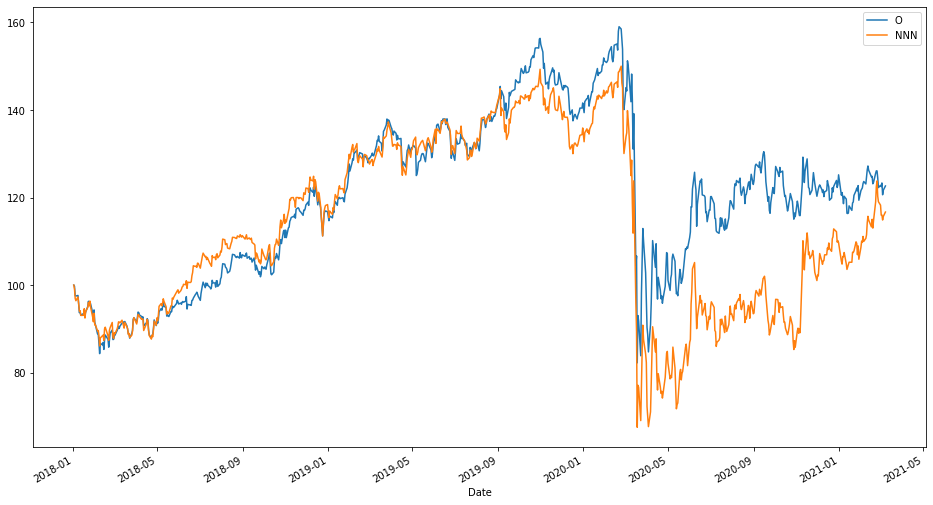

In [20]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [21]:
# neste caso estou colocando valores randomicamente para gerar os  pesos
weights = np.random.random(len(ativos))
weights /= np.sum(weights)
weights


array([0.38687383, 0.61312617])

In [22]:
portofolio_1 = str(round(np.dot(avg_returns_a, weights),5) *100) + ' %'
print(portofolio_1) 


13.195 %


In [23]:
sum(weights)

1.0